In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2025-11-30 / Aki Taanila


## 7/7 Kaavioiden oletusparametrit ja niiden vaihtaminen

Matplotlib-grafiikassa lukuisilla parametreilla on oletusarvot, joita voit muuttaa. Jos esimerkiksi haluat käyttää kaavioissa tiettyä fonttia, niin ei kannata vaihtaa fonttia jokaiselle kaaviolle erikseen. Oletusparametrit ja niiden arvot voit listata **rcParams**-komennolla.

### Tuonit ja alkuvalmistelut

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

In [3]:
# Kaavio ilman oletusparametrien määrityksiä.
df1 = pd.DataFrame({'Myynti 2017':[1321847, 852669, 1032199, 568230]},
                    index=['Helsinki', 'Turku', 'Tampere', 'Oulu'])
df1

,Myynti 2017
Helsinki,1321847
Turku,852669
Tampere,1032199
Oulu,568230


### Kaavio ennen oletusparametrien muutoksia

Text(0.5, 0, 'Miljoonaa euroa')

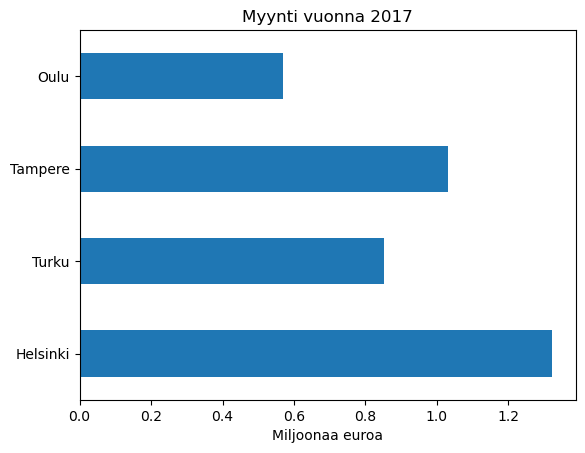

In [4]:
(df1/1000000).plot(kind='barh', legend=False)
plt.title('Myynti vuonna 2017')
plt.xlabel('Miljoonaa euroa')

### Kaavio oletusparametrien säätämisen jälkeen

Seuraavassa määritetään:
- pääteviivallinen fontti (**serif**)
- fonttilaji **Times New Roman**
- akselien asteikkojen nimiöille (**xtick.labelsize**, **yticklabelsize**) fonttikoko 8
- kuvion oletuskoko **4 x 3**.

In [5]:
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8
rcParams['figure.figsize'] = [4, 3]

Text(0.5, 0, 'Miljoonaa euroa')

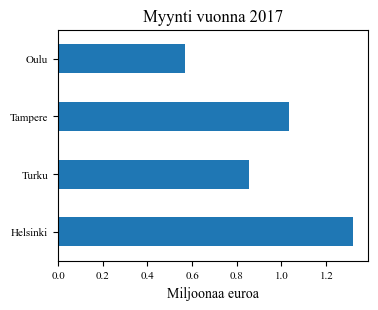

In [6]:
(df1/1000000).plot(kind='barh', legend=False)
plt.title('Myynti vuonna 2017')
plt.xlabel('Miljoonaa euroa')

### Lisätietoa

Löydät kaikki muistiot osoitteesta https://tilastoapu.wordpress.com/python.